# LASSO とは

データ行列と出力ベクトルをそれぞれ
\begin{align*}
    \mathbf{X} = \left( \begin{matrix}
        \mathbf{x}_1^T \\
        \mathbf{x}_2^T \\
        \vdots \\
        \mathbf{x}_n^T
        \end{matrix} \right)
        \in \mathbb{R}^{n \times p},
        \qquad
       \mathbf{y} = \left( \begin{matrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{matrix} \right) \in \mathbb{R}^n
\end{align*}
とおく。
ここで

- $ p $ : 説明変数の次元
- $ n $ : データ数
- $ \mathbf{x}_i $ :  $i$ 番目のデータ

LASSO では以下の式を最小化する重みベクトル $\beta_0 \in \mathbb{R}, \boldsymbol{\beta} \in \mathbb{R}^{p}$ を推定する。
\begin{align*}
    {\rm arg~min}_{\beta_0, \boldsymbol{\beta}}
    \cfrac{1}{2} \parallel \mathbf{y} - \beta_0\mathbf{1} - \mathbf{X} \boldsymbol{\beta} \parallel_2^2 + \lambda \parallel \boldsymbol{\beta} \parallel_1
\end{align*}

## 座標降下法 ($\beta_0 = 0$ の場合)
\begin{align*}
    {\rm arg~min}_{\boldsymbol{\beta} \in \mathbb{R}^p}
    \cfrac{1}{2} \parallel \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \parallel_2^2
    + \lambda \parallel \boldsymbol{\beta} \parallel_1
\end{align*}

座標降下法は他の係数はすでに更新したことを仮定し，重み $\beta_j$ に対して部分的に最適化を行う手法である。

\begin{align}
    &\tilde{\beta}_j
    \leftarrow S (z_j,  \lambda)
    = \left\{
        \begin{matrix}
            (z_j - \lambda) /n  & (z_j>0 \& |z_j| > \lambda) \\
            (z_j + \lambda) /n & (z_j<0 \& |z_j| > \lambda) \\
            0                 & (|z_j| \leq \lambda)
        \end{matrix}
        \right. \\
    &\mathbf{z} = \left( \begin{matrix} z_1 \\  z_2 \\ \vdots \\ z_p \end{matrix} \right)
    = \mathbf{X} (\mathbf{y} - \tilde{\mathbf{y}}^{(j)})
    \notag
\end{align}
ここで、
\begin{align*}
    \tilde{y}^{(j)}_i = \sum_{k=1 (\neq j)}^p x_{ik} \tilde{\beta}_k ,
    \quad
    \tilde{\mathbf{y}}^{(j)}
    = \left( \begin{matrix} \tilde{y}^{(j)}_1 \\ \tilde{y}^{(j)}_2 \\ \vdots \\ \tilde{y}^{(j)}_n \end{matrix} \right) 
    = \left( \begin{matrix}
        \displaystyle \sum_{k=1(\neq j)}^p x_{1k} \tilde{\beta}_k \\
        \displaystyle \sum_{k=1(\neq j)}^p x_{2k} \tilde{\beta}_k \\
        \vdots \\
        \displaystyle \sum_{k=1(\neq j)}^p x_{nk} \tilde{\beta}_k
        \end{matrix} \right)
\end{align*}

### 1次元の場合

\begin{align*}
    {\rm arg~min}_{\beta \in \mathbb{R}}
    = \cfrac{1}{2} \sum_{i=1}^n (y_i - x_i \beta_1)^2 + \lambda |\beta_1|
\end{align*}

\begin{align*}
    \cfrac{1}{2} \sum_{i=1}^n (y_i - x_i \beta_1)^2 + \lambda \beta_1 {\rm sgn\ }(\beta_1)
    =& \cfrac{1}{2} \sum_{i=1}^n x_i^2 \beta_1^2 - \left(\sum_{i=1}^n y_i x_i - \lambda{\rm sgn\ }(\beta_1) \right) \beta_1 + const. \\
    =& \cfrac{1}{2} \sum_{i=1}^n x_i^2 \left\{
            \beta_1 -
            \left(\sum_{i=1}^n y_i x_i - \lambda{\rm sgn\ }(\beta_1) \right) \left( \sum_{i=1}^n x_i^2 \right)^{-1}
        \right\}^2
        + const. \\
    =& \cfrac{1}{2} n\left\{
            \beta_1 -
            \cfrac{1}{n}\left( \sum_{i=1}^n y_i x_i - \lambda {\rm sgn\ }(\beta_1) \right)
        \right\}^2
        + const. 
\end{align*}
最後はデータを白色化 ($ \sum_i x_i = 0, \sum_i x_i^2 = n $) しているものとして計算。
\begin{align*}
    \hat{\beta}_1 = \left\{ \begin{matrix}
        \displaystyle \cfrac{1}{n} \left(\sum_{i=1}^n y_ix_i - \lambda\right) & \displaystyle \sum_{i=1}^n y_i x_i > \lambda \\
        \displaystyle \cfrac{1}{n} \left(\sum_{i=1}^n y_ix_i + \lambda\right) & \displaystyle \sum_{i=1}^n y_i x_i < -\lambda \\
        0                                           & \displaystyle - \lambda \leq \sum_{i=1}^n y_i x_i \leq \lambda
        \end{matrix} \right.
\end{align*}

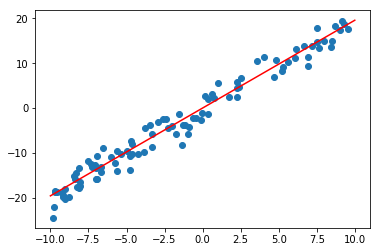

In [2]:
# 1次元


import numpy as np;
import matplotlib.pyplot as plt;

# 　generating data

b = 2.0;
s = 2.0;
x = np.random.rand (1,100) * 20.0 - 10.0;
y = b*x + s*np.random.randn (1, 100)

plt.scatter (x[0,:],y[0,:])


# normalization
m = np.mean (x,axis=1);
s = np.std (x, axis=1);
xw = (x-m)/s;

# estimating
_, n = x.shape
z = y.dot (xw.T) 
beta = 0.0;
lmd = 5.0;
if (z > lmd):
    beta = (z - lmd)/(n*s);
elif (z < -lmd):
    beta = (z + lmd)/(n*s);

xs = np.linspace (-10,10);
plt.plot (xs, (beta*xs).reshape (50,), 'r');

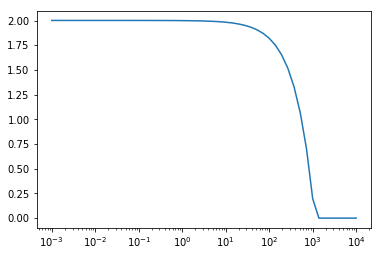

In [48]:
llmds = np.linspace (-3,4);
idx = 0;
betas = np.zeros_like (llmds);
for lmd in (10.0 ** llmds):
    if (z > lmd):
        betas[idx] = (z - lmd)/(n*s);
    elif (z < -lmd):
        betas[idx] = (z + lmd)/(n*s);
        
    idx += 1;
    
plt.plot ( (10.0 ** llmds), betas);
plt.xscale ('log')

### $n$ 次元の場合

\begin{align*}
    L (\boldsymbol{\beta}) = \cfrac{1}{2} \parallel \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \parallel_2^2 + \lambda \parallel \boldsymbol{\beta} \parallel_1
\end{align*}
とおいて、$\boldsymbol{\beta}$ で微分すると、
\begin{align*}
    \cfrac{\partial L}{\partial\boldsymbol{\beta}}
    =& -\mathbf{X}^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \lambda {\rm sgn\ } (\boldsymbol{\beta}) \\
    \cfrac{\partial L}{\partial \beta_j}
    =& -\sum_{i=1}^n x_{ij} \left(y_i - \sum_{k=1}^p x_{ik} \beta_k \right) + \lambda {\rm sgn\ } (\beta_j) \\
    =& -\sum_{i=1}^n x_{ij} \left(y_i - \sum_{k=1(\neq j)}^p x_{ik} \beta_k - x_{ij} \beta_j\right) + \lambda {\rm sgn\ } (\beta_j) \\
    =& n \beta_j - \sum_{i=1}^n x_{ij} \left(y_i - \sum_{k=1 (\neq j)}^p x_{ik} \beta_k \right) + \lambda {\rm sgn\ } (\beta_j)
\end{align*}
$\partial L / \partial \beta_j = 0$ とおくと、
\begin{align*}
  \tilde{\beta}_j = \cfrac{1}{n} \sum_{i=1}^n x_{ij} \left( y_i - \sum_{k=1(\neq j)}^p x_{ik} \beta_{k} \right) - \cfrac{\lambda}{n} {\rm sgn\ }(\beta_j)
\end{align*}
$\beta_j$ の正負に注意して最適値をとると(1) になる。

<IPython.core.display.Javascript object>


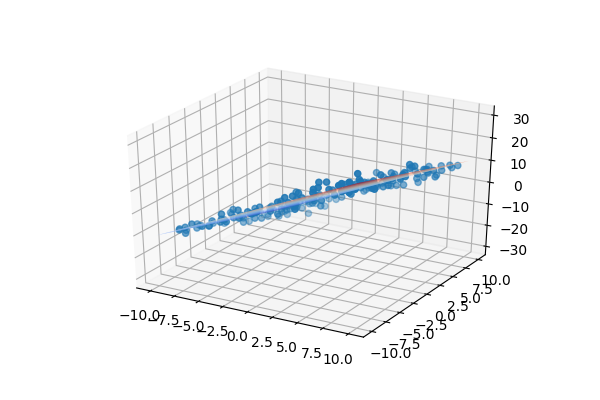

[[ 2.01181917]
 [-0.95546359]]


In [54]:
# 2次元

import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib import cm
%matplotlib notebook


dim = 2;
n = 200;

b = np.array ([2,-1]);
s = 2.0;
x = (20*np.random.rand (dim, n)-10);
y = b.dot (x) + s * (np.random.randn (1,n))


from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.scatter(x[0,:], x[1,:], y)

# normalization
dim, n = x.shape;
m = np.mean (x,axis=1)
s = np.std (x, axis=1)
xnm = (x-m.reshape (dim,1))/s.reshape (dim,1)


# estimating
maxIter = 1e3;
epsilon = 1e-9;
lmd = 1e-9;
beta = np.ones ((dim,1),dtype=float);
old_beta = np.zeros ((dim,1),dtype=float)
iters = 0;
while (iters<maxIter and ((beta-old_beta).T.dot(beta-old_beta)>epsilon)):
    old_beta = np.copy (beta);
    
    # ここ頭の悪い実装
    for j in range (dim):
        rj = np.zeros((1,n));
        for i in range (n):
            tmp = 0.0;
            for k in range (dim):
                if k==j:
                    continue;
                tmp += xnm[k,i] * beta[k,0];
            rj[0,i] = xnm[j,i]*(y[0,i] - tmp);
        zj = np.sum (rj,axis=1);
        if zj > lmd:
            beta[j,0] = (zj - lmd)/(n*s[j]);
        elif zj < -lmd:
            beta[j,0] = (zj + lmd)/(n*s[j]);
        else:
            beta[j,0] = 0.0;
    
    iters += 1;

            
xs = np.linspace (-10,10);
ys = np.linspace (-10,10);
XS, YS = np.meshgrid (xs,ys);

ax.plot_surface (XS,YS,XS*beta[0,0] + YS*beta[1,0], cmap=cm.coolwarm)
plt.show()

print (beta)

<IPython.core.display.Javascript object>


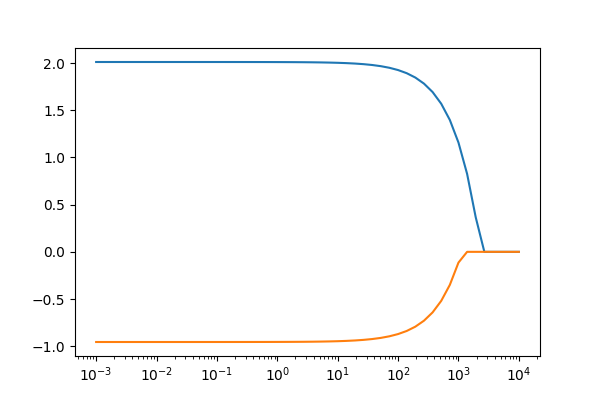

In [55]:
llmds = np.linspace (-3,4);
sz = len (llmds);
idx = 0;
betas = np.zeros((dim,sz));

for lmd in (10.0 ** llmds):
    old_beta = np.zeros ((dim,1),dtype=float)
    iters = 0;
    while (iters<maxIter and ((beta-old_beta).T.dot(beta-old_beta)>epsilon)):
        old_beta = np.copy (beta);

        # ここ頭の悪い実装
        for j in range (dim):
            rj = np.zeros((1,n));
            for i in range (n):
                tmp = 0.0;
                for k in range (dim):
                    if k==j:
                        continue;
                    tmp += xnm[k,i] * beta[k,0];
                rj[0,i] = xnm[j,i]*(y[0,i] - tmp);
            zj = np.sum (rj,axis=1);
            if zj > lmd:
                beta[j,0] = (zj - lmd)/(n*s[j]);
            elif zj < -lmd:
                beta[j,0] = (zj + lmd)/(n*s[j]);
            else:
                beta[j,0] = 0.0;

        iters += 1;
    betas[:,idx] = beta[:,0].T
    idx += 1;

plt.figure (figsize=(6,4));
plt.plot (10.0 ** llmds, betas[0,:])
plt.plot (10.0 ** llmds, betas[1,:])
plt.xscale ('log')

<IPython.core.display.Javascript object>


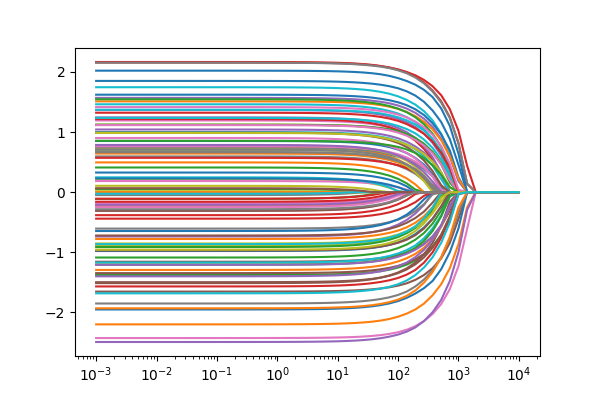

In [5]:
# 多次元

import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib import cm
%matplotlib notebook


dim = 100;
n = 100;

b = np.random.randn (dim);
s = 2.0;
x = (20*np.random.rand (dim, n)-10);
y = b.dot (x) + s * (np.random.randn (1,n))


# normalization
dim, n = x.shape;
m = np.mean (x,axis=1)
s = np.std (x, axis=1)
xnm = (x-m.reshape (dim,1))/s.reshape (dim,1)


# estimating
maxIter = 1e3;
epsilon = 1e-9;
llmds = np.linspace (-3,4);
sz = len (llmds);
idx = 0;
betas = np.zeros((dim,sz));

for lmd in (10.0 ** llmds):
    beta = np.ones ((dim,1),dtype=float)
    old_beta = np.zeros ((dim,1),dtype=float)
    iters = 0;
    while (iters<maxIter and ((beta-old_beta).T.dot(beta-old_beta)>epsilon)):
        old_beta = np.copy (beta);

        # ここ頭の悪い実装
        for j in range (dim):
            rj = np.zeros((1,n));
            for i in range (n):
                tmp = 0.0;
                for k in range (dim):
                    if k==j:
                        continue;
                    tmp += xnm[k,i] * beta[k,0];
                rj[0,i] = xnm[j,i]*(y[0,i] - tmp);
            zj = np.sum (rj,axis=1);
            if zj > lmd:
                beta[j,0] = (zj - lmd)/(n*s[j]);
            elif zj < -lmd:
                beta[j,0] = (zj + lmd)/(n*s[j]);
            else:
                beta[j,0] = 0.0;

        iters += 1;
    betas[:,idx] = beta[:,0].T
    idx += 1;

plt.figure (figsize=(6,4));
for d in range (dim):
    plt.plot (10.0 ** llmds, betas[d,:])
plt.xscale ('log')